# Notebook for Med-Insurance :

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('magma_r')
import matplotlib.pyplot as plt

In [137]:
insurance = pd.read_csv('data/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [138]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [139]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [140]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [141]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [142]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


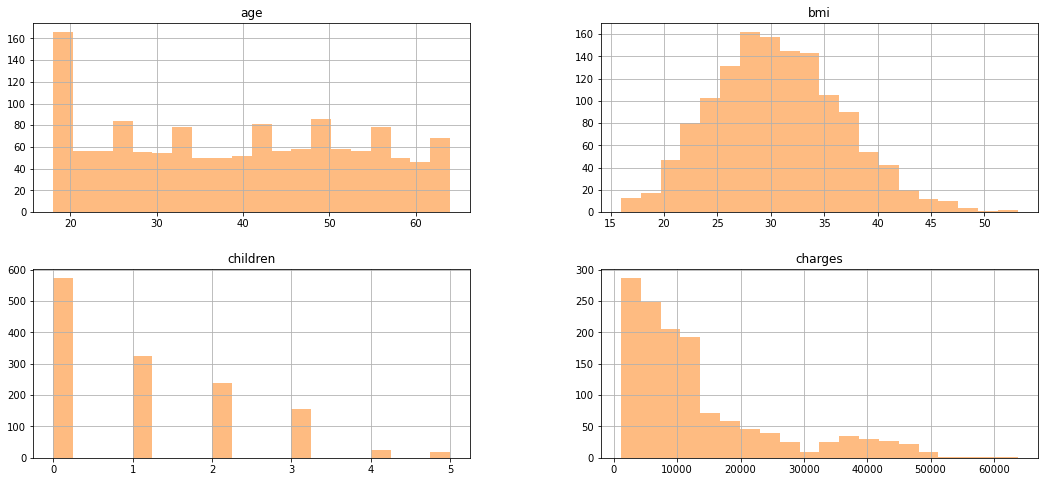

In [143]:
insurance.hist(bins=20, figsize=(18, 8))
plt.show()

In [144]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(insurance, test_size=0.2, random_state=42)
test_set.head()

,age,sex,bmi,children,smoker,region,charges
764,45,female,25.175,2,no,northeast,9095.06825
887,36,female,30.020,0,no,northwest,5272.17580
890,64,female,26.885,0,yes,northwest,29330.98315
1293,46,male,25.745,3,no,northwest,9301.89355
259,19,male,31.920,0,yes,northwest,33750.29180


In [145]:
insurance['bmi_cat'] = pd.cut(insurance['bmi'], 
                            bins=[15, 20, 25, 30, 35, np.inf],
                            labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

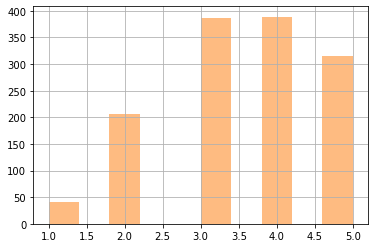

In [146]:
insurance['bmi_cat'].hist()

In [147]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(insurance, insurance['bmi_cat']):
    strat_train_set = insurance.loc[train_index]
    strat_test_set = insurance.loc[test_index]


In [148]:
strat_test_set['bmi_cat'].value_counts() / len(strat_test_set)

4    0.291045
3    0.291045
5    0.235075
2    0.152985
1    0.029851
Name: bmi_cat, dtype: float64

In [149]:
def bmi_cat_proportions(data):
    return data['bmi_cat'].value_counts() / len(data)

train_set, test_set = train_test_split(insurance, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    'Overall': bmi_cat_proportions(insurance),
    'Stratified': bmi_cat_proportions(strat_test_set),
    'Random': bmi_cat_proportions(test_set),
}).sort_index()

compare_props['Rand. %error'] = 100*compare_props['Random']/compare_props['Overall'] - 100
compare_props['Strat. %error'] = 100*compare_props['Stratified']/compare_props['Overall'] - 100

In [150]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.030643,0.029851,0.033582,9.592282,-2.584638
2,0.153961,0.152985,0.126866,-17.598899,-0.633966
3,0.288490,0.291045,0.291045,0.885469,0.885469
4,0.290732,0.291045,0.283582,-2.459425,0.107432
5,0.236173,0.235075,0.264925,12.174098,-0.465237


In [151]:
strat_test_set.head()

,age,sex,bmi,children,smoker,region,charges,bmi_cat
1040,35,female,28.025,0,yes,northwest,20234.85475,3
1141,41,female,32.600,3,no,southwest,7954.51700,4
216,53,female,26.600,0,no,northwest,10355.64100,3
467,56,female,33.820,2,no,northwest,12643.37780,4
765,57,female,31.825,0,no,northwest,11842.62375,4


In [152]:
strat_train_set.head()

,age,sex,bmi,children,smoker,region,charges,bmi_cat
1120,23,female,31.40,0,yes,southwest,34166.2730,4
1079,63,male,33.66,3,no,southeast,15161.5344,4
239,44,male,38.06,1,no,southeast,7152.6714,5
417,36,female,22.60,2,yes,southwest,18608.2620,2
934,32,male,37.18,2,no,southeast,4673.3922,5


In [153]:
strat_test_set.drop('bmi_cat', axis=1, inplace=True)
strat_train_set.drop('bmi_cat', axis=1, inplace=True)

In [154]:
insurance = strat_train_set.copy()
insurance.head()

,age,sex,bmi,children,smoker,region,charges
1120,23,female,31.40,0,yes,southwest,34166.2730
1079,63,male,33.66,3,no,southeast,15161.5344
239,44,male,38.06,1,no,southeast,7152.6714
417,36,female,22.60,2,yes,southwest,18608.2620
934,32,male,37.18,2,no,southeast,4673.3922


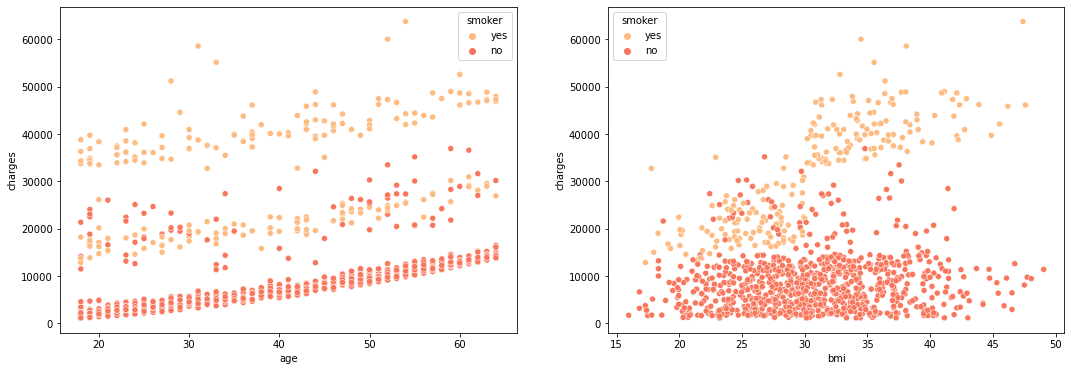

In [155]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.scatterplot(x=insurance['age'], y=insurance['charges'], hue=insurance['smoker'], ax=ax[0])
sns.scatterplot(x=insurance['bmi'], y=insurance['charges'], hue=insurance['smoker'], ax=ax[1])
plt.show()

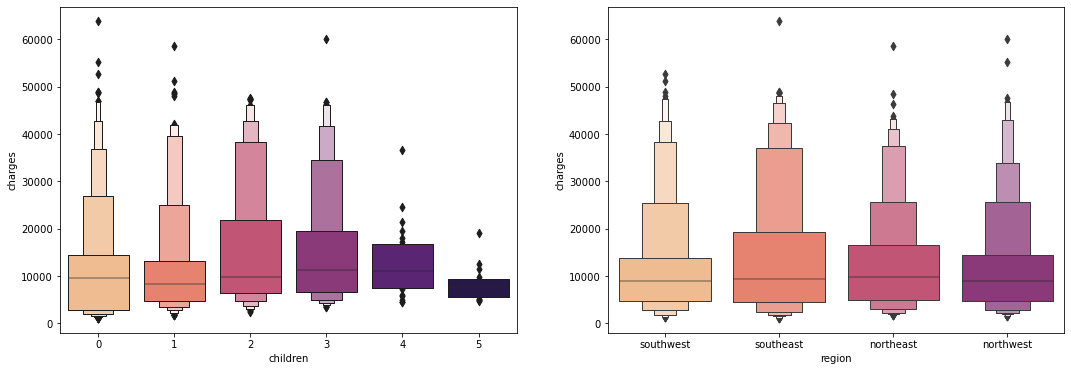

In [156]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.boxenplot(x=insurance['children'], y=insurance['charges'], ax=ax[0])
sns.boxenplot(x=insurance['region'], y=insurance['charges'], ax=ax[1])
plt.show()

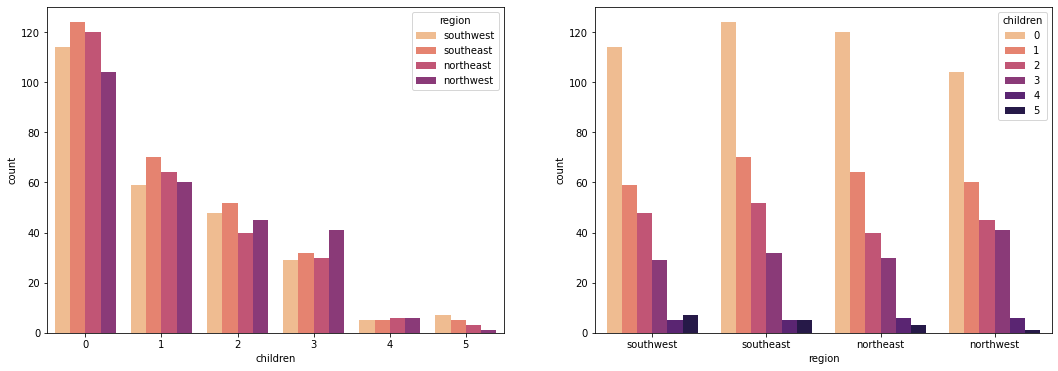

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(x=insurance['children'], hue=insurance['region'], ax=ax[0])
sns.countplot(x=insurance['region'], hue=insurance['children'], ax=ax[1])
plt.show()

In [158]:
corr_matrix = insurance.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.297258
bmi         0.206319
children    0.080918
Name: charges, dtype: float64

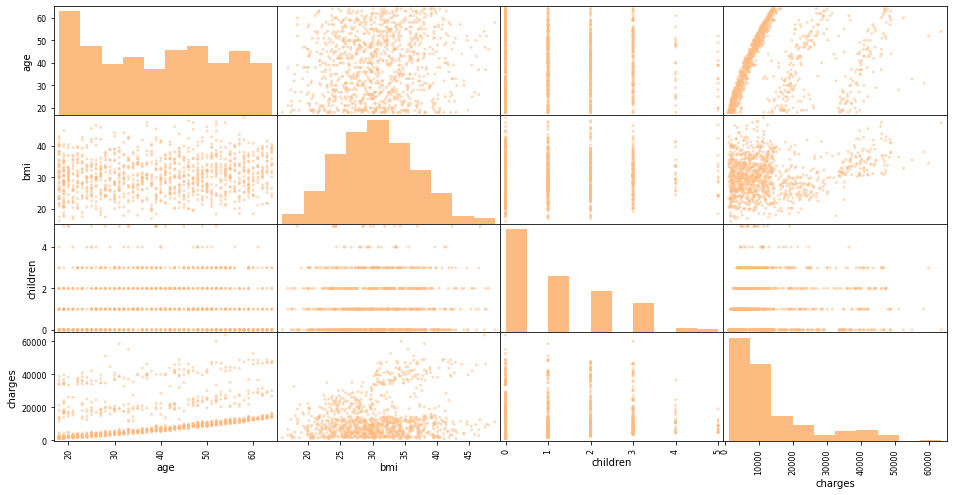

In [159]:
from pandas.plotting import scatter_matrix

attribs = ['age', 'bmi', 'children', 'charges']
scatter_matrix(insurance[attribs], figsize=(16, 8))
plt.show()

In [160]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
1120,23,female,31.40,0,yes,southwest,34166.2730
1079,63,male,33.66,3,no,southeast,15161.5344
239,44,male,38.06,1,no,southeast,7152.6714
417,36,female,22.60,2,yes,southwest,18608.2620
934,32,male,37.18,2,no,southeast,4673.3922


In [161]:
insurance = strat_train_set.drop('charges', axis=1)
insurance_labels = strat_train_set['charges'].copy()

In [162]:
insurance_num = insurance.drop(['sex', 'smoker', 'region'], axis=1)
insurance_num.head()

,age,bmi,children
1120,23,31.40,0
1079,63,33.66,3
239,44,38.06,1
417,36,22.60,2
934,32,37.18,2


In [163]:
insurance_cat = insurance[['sex', 'smoker', 'region']]
insurance_cat.head()

,sex,smoker,region
1120,female,yes,southwest
1079,male,no,southeast
239,male,no,southeast
417,female,yes,southwest
934,male,no,southeast


In [164]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

insurance_num_prep = num_pipeline.fit_transform(insurance_num)

In [165]:
insurance_num_prep

array([[-1.15853825,  0.12494762, -0.90263132],
       [ 1.68760094,  0.49879409,  1.53835144],
       [ 0.33568483,  1.22663678, -0.0889704 ],
       ...,
       [ 0.26453135, -0.09009681, -0.0889704 ],
       [-1.37199869,  0.38961768, -0.0889704 ],
       [ 1.18952658,  0.90241594,  1.53835144]])

In [166]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(insurance_num)
cat_attribs = list(insurance_cat)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

insurance_prep = full_pipeline.fit_transform(insurance)

## Evaluation :

In [167]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(insurance_prep, insurance_labels)
lin_reg.score(insurance_prep, insurance_labels)

0.7519890852754773

In [168]:
training_samples = insurance.iloc[:5]
training_labels = insurance_labels[:5]
training_samples_prep = full_pipeline.transform(training_samples)

print(lin_reg.predict(training_samples_prep))
print(list(training_labels))

[27510.90131183 15643.73654271 11327.4266189  28775.48949048
  8484.38789864]
[34166.273, 15161.5344, 7152.6714, 18608.262, 4673.3922]


In [169]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

insurance_predictions = lin_reg.predict(insurance_prep)
lin_rmse = mean_absolute_error(insurance_labels, insurance_predictions)
print(lin_rmse)

4115.962274846326


In [170]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(insurance_prep, insurance_labels)
tree_reg.score(insurance_prep, insurance_labels)

0.9988141928703199

In [171]:
insurance_predictions = tree_reg.predict(insurance_prep)
tree_rmse = mean_absolute_error(insurance_labels, insurance_predictions)
print(tree_rmse)

17.889135373831778


In [172]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, insurance_prep, insurance_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [173]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('STDev:', scores.std())

display_scores(tree_rmse_scores)

Scores: [5325.02143071 5559.01338572 7147.62822692 6754.52464736 5170.07596176
 6366.04436431 7884.92268797 5507.98114192 5194.58813502 6136.39441007]
Mean: 6104.619439175299
STDev: 878.1822802068359


In [174]:
lin_scores = cross_val_score(lin_reg, insurance_prep, insurance_labels,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5101.81102851 5924.75805781 6767.35475936 6040.26564594 4602.51389313
 6647.11011723 6991.46327669 5786.48626455 5287.97748743 6941.37612741]
Mean: 6009.111665805288
STDev: 787.1150323462433


In [175]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(insurance_prep, insurance_labels)
forest_reg.score(insurance_prep, insurance_labels)

0.9782262849759741

In [176]:
insurance_predictions = forest_reg.predict(insurance_prep)
forest_mse = mean_squared_error(insurance_labels, insurance_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

1773.0683609524187


In [177]:
forest_scores = cross_val_score(forest_reg, insurance_prep, insurance_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3811.98981197 4563.52513174 5483.18226081 4448.76859639 2798.03073349
 4646.08909092 5918.68603726 4668.42902506 4265.28791849 5189.34739208]
Mean: 4579.333599820753
STDev: 829.0414150633928


In [178]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid,
                cv=5, scoring='neg_mean_squared_error',
                return_train_score=True)
grid_search.fit(insurance_prep, insurance_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [179]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [180]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [181]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(np.sqrt(-mean_score), params)

5480.5365081638265 {'max_features': 2, 'n_estimators': 3}
5171.575857617915 {'max_features': 2, 'n_estimators': 10}
4936.875483349912 {'max_features': 2, 'n_estimators': 30}
5218.091621279345 {'max_features': 4, 'n_estimators': 3}
4855.052078728838 {'max_features': 4, 'n_estimators': 10}
4662.452142267935 {'max_features': 4, 'n_estimators': 30}
5227.173722591842 {'max_features': 6, 'n_estimators': 3}
4774.085159008655 {'max_features': 6, 'n_estimators': 10}
4701.177452337495 {'max_features': 6, 'n_estimators': 30}
5287.603544360903 {'max_features': 8, 'n_estimators': 3}
4777.598875126567 {'max_features': 8, 'n_estimators': 10}
4713.753093565056 {'max_features': 8, 'n_estimators': 30}
5614.716865844173 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
5211.488336322019 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
5566.755922293457 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
5024.894126191991 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [182]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('charges', axis=1)
y_test = strat_test_set['charges'].copy()

X_test_prep = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prep)

final_rmse = mean_absolute_error(y_test, final_predictions)
print(final_rmse)

2734.2345004741915


In [183]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([3988.01236813, 5950.48020633])

In [184]:
result_df = pd.DataFrame(list(zip(y_test, final_predictions)))
result_df.head(10)

,0,1
0,20234.85475,20489.367617
1,7954.51700,8522.191213
2,10355.64100,12458.108888
3,12643.37780,13760.956718
4,11842.62375,11993.397450
5,13451.12200,13332.300333
6,1633.04440,3339.826998
7,14455.64405,18710.695908
8,12981.34570,12910.972897
9,7261.74100,6580.389825


## Saving Pipeline and Final Model :

In [185]:
import pickle

with open("pickles/final_model.sav", "wb") as f:
    pickle.dump(final_model, f)

with open("pickles/full_pipeline.sav", "wb") as f:
    pickle.dump(full_pipeline, f)